Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scvi
import squidpy as sp

from sklearn.feature_selection import SelectKBest

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
Global seed set to 0
/home/aleks/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .auto

In [2]:
filename_mouse_embryo = 'E9.5_E1S1.MOSTA.h5ad'
filename_mouse_brain = 'Mouse_brain_cell_bin.h5ad'
K_best_features = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]

In [3]:
def read_file(filename):
    adata = sc.read_h5ad(filename)

    return adata

In [4]:
def preprocess_file(adata):
    #get rid of cells with fewer than 200 geners
    sc.pp.filter_cells(adata, min_genes=200)
    #get rid of genes that are found in fewer than 3 cells
    sc.pp.filter_genes(adata, min_cells=3)
    
    return adata

In [5]:
def select_best_features(adata, k_best_value):
    feature_selector = SelectKBest(score_func = f_regression, k=k_best_value)
    

In [6]:
adata = read_file(filename_mouse_brain)
adata = preprocess_file(adata)
adata



AnnData object with n_obs × n_vars = 50140 × 23472
    obs: 'annotation', 'n_genes'
    var: 'Gene', 'n_cells'
    uns: 'annotation_colors'
    obsm: 'spatial'
    layers: 'counts'

/home/aleks/.local/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


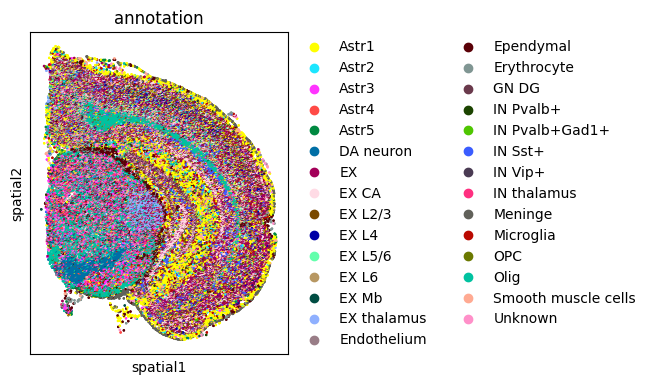

In [7]:
sp.pl.spatial_scatter(adata,shape=None, color="annotation")

In [8]:
sum(adata.obs['annotation']=='Unknown')

3704